In [12]:
# import modules
%matplotlib inline
from IPython.display import clear_output

import os
import pylab
import random
import numpy as np
import pandas as pd
import matplotlib.patches as patches

from skimage import transform
from scipy.misc import imread, imresize
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from lasagne import layers, updates, nonlinearities
from nolearn.lasagne import NeuralNet, BatchIterator, visualize


project_root = os.path.join(os.path.expanduser('~'), 
                            'workspace/.project/right_whale')
data_root = os.path.join(project_root, 'data')
subs_root = os.path.join(project_root, 'subs')

In [2]:
lb  = LabelEncoder()

In [8]:
# load train and test 
train = pd.read_csv(os.path.join(data_root, 'train.csv'))
test = pd.read_csv(os.path.join(data_root, 'sample_submission.csv'))

train_points = pd.read_csv(os.path.join(data_root, 'train_with_points.csv'))

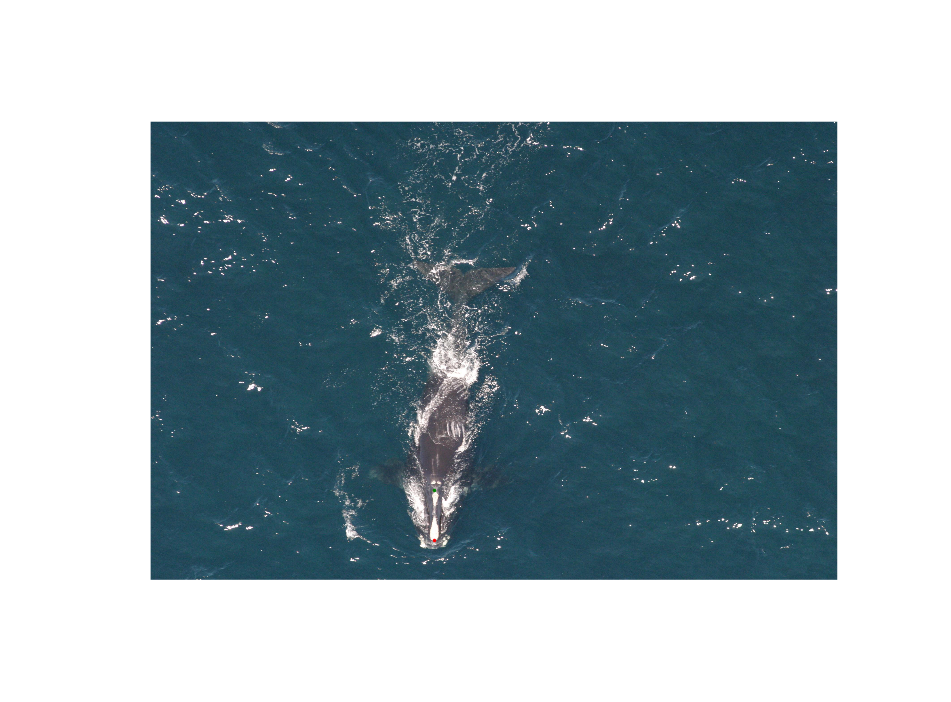

In [28]:
# visualize data
pylab.rcParams['figure.figsize'] = 16, 12

i = random.randrange(0, train.shape[0])

ax = pylab.gca()
img = imread(data_root+"/train/"+train.Image[i])
ax.imshow(img)    

x1 = train_points.ix[i, 2]
y1 = train_points.ix[i, 3]
x2 = train_points.ix[i, 4]
y2 = train_points.ix[i, 5]

pylab.plot(x1, y1, 'r.')
pylab.plot(x2, y2, 'g.')

pylab.axis('off')
pylab.show()

In [9]:
train_points.head()

,Image,whaleID,bonnet_tip_x,bonnet_tip_y,blowhead_x,blowhead_y
0,w_7812.jpg,whale_48813,1668.211366,1370.097707,1647.792622,1108.737787
1,w_4598.jpg,whale_09913,1639.625125,1212.873380,1353.762712,1265.962114
2,w_3828.jpg,whale_45062,1118.947159,908.634098,1345.595214,963.764706
3,w_8734.jpg,whale_74162,1690.671984,1223.082752,1682.504487,1069.942173
4,w_3251.jpg,whale_99558,1655.960120,1071.984048,1662.085743,878.005982


In [ ]:
# make data for train and test
X=[]
scale = 320
cnt = 0; idx = 0

for i in train.Image[:100]:
    cnt += 1; idx += 1; print idx
    img = transform.resize(img, (img.shape[0]*320/img.shape[1], 320))
    
    a = (320 - img.shape[0])//2
    img = np.pad(img, [(a, a), (0, 0), (0, 0)], mode='constant')
    
    img = (img / 255.) - 0.5
    X.append(img)
    if cnt > 9:
        clear_output()
        cnt = 0
    
X=np.stack(X).astype('float32')
Y = train.whaleID.values
'''
cnt = 0; idx = 0
X_test=[]
for i in test.Image:
    cnt += 1; idx += 1; print idx
    img=imread((data_root+"/testcrops/"+i), flatten=True)
    img=imresize(img,(scale, scale))
    img = (img / 255.)
    X_test.append(img)
    if cnt > 9:
        clear_output()
        cnt = 0
    
X_test=np.stack(X_test).astype('float32')'''

print X.shape, Y.shape, X_test.shape

In [38]:
im = transform.resize(img, (img.shape[0]*320/img.shape[1], 320))
a = (320 - im.shape[0])//2
im = np.pad(im, [(a, a), (0, 0), (0, 0)], mode='constant')

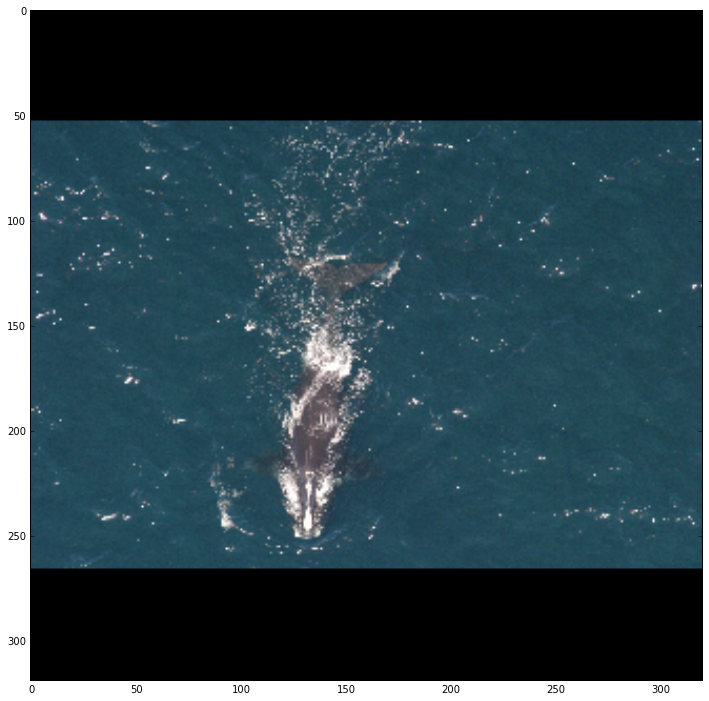

In [39]:
pylab.imshow(im)

In [ ]:
# make data for train and test
X=[]
scale = 384
cnt = 0; idx = 0

for i in train.Image:
    cnt += 1; idx += 1; print idx
    img=imread((data_root+"/traincrops/"+i))
    
    img = transform.resize(img, (img.shape[0]*scale/img.shape[1], scale))
    temp = (scale - img.shape[0])//2
    img = np.pad(img, [(temp, temp), (0, 0), (0, 0)], mode='constant')
    
    X.append(img)
    if cnt > 9:
        clear_output()
        cnt = 0
    
X=np.stack(X).astype('float32')
Y = train.whaleID.values
'''
cnt = 0; idx = 0
X_test=[]
for i in test.Image:
    cnt += 1; idx += 1; print idx
    img=imread((data_root+"/testcrops/"+i))
    img=imresize(img,(scale, scale))
    X_test.append(img)
    if cnt > 9:
        clear_output()
        cnt = 0
    
X_test=np.stack(X_test).astype('float32')

print X.shape, Y.shape, X_test.shape'''

In [ ]:
# convert to CNN readable format
X = X - 0.5
X = X.reshape((-1, 1, scale, scale))
y = lb.fit_transform(Y).astype('int32')

X_test = X_test - 0.5
X_test = X_test.reshape((-1, 1, scale, scale))